In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [5]:
df1 = pd.read_csv('oversampled_CICIDS2018_Thursday.csv')
df2 = df1.groupby(['Timestamp'])['Flow Duration'].count()
df2 = pd.DataFrame(df2).reset_index()
df2.columns=['Timestamp','BiFlowsCount']
df = df1.merge(df2, left_on='Timestamp', right_on='Timestamp')
df = df.sort_values('Timestamp')
df

,Unnamed: 0,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,target,BiFlowsCount
990791,734499,80,6,15/02/2018 01:00:00,974,3,4,161,488,161,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,3
990792,753617,80,6,15/02/2018 01:00:00,5291706,4,4,97,232,97,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,3
990793,629623,445,6,15/02/2018 01:00:00,562585,6,5,455,338,140,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,3
534832,455110,445,6,15/02/2018 01:00:01,1394792,7,5,364,582,103,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,10
534833,690851,445,6,15/02/2018 01:00:01,657161,6,5,455,338,140,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854453,345458,3389,6,15/02/2018 12:59:59,2509156,8,7,1128,1581,661,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,5
854454,702071,443,6,15/02/2018 12:59:59,85774391,13,11,1376,1302,517,...,145751.678165,489175,283051,42358064.5,2.245036e+07,58232868,26483261,Benign,0,5
854451,422003,445,6,15/02/2018 12:59:59,334473,3,1,0,0,0,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,5
854450,331980,3389,6,15/02/2018 12:59:59,2403128,8,7,1128,1581,661,...,0.000000,0,0,0.0,0.000000e+00,0,0,Benign,0,5


In [6]:
df.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       '

In [7]:
del df['Unnamed: 0']
del df['target']

In [8]:
features = ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min', 'BiFlowsCount']

In [9]:
df["Label"].value_counts()

Benign                   500311
DoS attacks-GoldenEye    394920
DoS attacks-Slowloris    104769
Name: Label, dtype: int64

In [10]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\kdagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [12]:
df['Target']=df['Label'].apply(targetify)

In [13]:
 y = df['Target']

In [14]:
X = X.fillna(0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(800000, 80) (800000,)
(200000, 80) (200000,)


In [16]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [17]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [18]:
importances = forest.feature_importances_

In [19]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [20]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 70: Fwd Seg Size Min (0.218038)
2. feature 67: Init Fwd Win Byts (0.086479)
3. feature 79: BiFlowsCount (0.069184)
4. feature 1: Protocol (0.043346)
5. feature 0: Dst Port (0.040593)
6. feature 48: PSH Flag Cnt (0.034430)
7. feature 12: Bwd Pkt Len Max (0.030305)
8. feature 15: Bwd Pkt Len Std (0.029089)
9. feature 49: ACK Flag Cnt (0.025685)
10. feature 21: Flow IAT Min (0.021298)
11. feature 68: Init Bwd Win Byts (0.019825)
12. feature 18: Flow IAT Mean (0.019812)
13. feature 22: Fwd IAT Tot (0.019599)
14. feature 26: Fwd IAT Min (0.019413)
15. feature 25: Fwd IAT Max (0.018170)
16. feature 23: Fwd IAT Mean (0.016647)
17. feature 75: Idle Mean (0.015499)
18. feature 3: Flow Duration (0.015094)
19. feature 20: Flow IAT Max (0.014915)
20. feature 41: Pkt Len Max (0.014753)
21. feature 77: Idle Max (0.012410)
22. feature 14: Bwd Pkt Len Mean (0.012077)
23. feature 29: Bwd IAT Std (0.011697)
24. feature 78: Idle Min (0.010497)
25. feature 27: Bwd IAT Tot (0.01

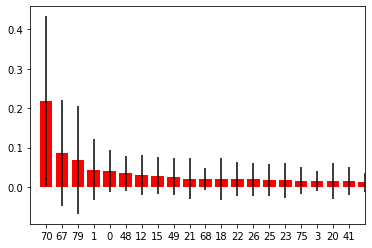

In [21]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

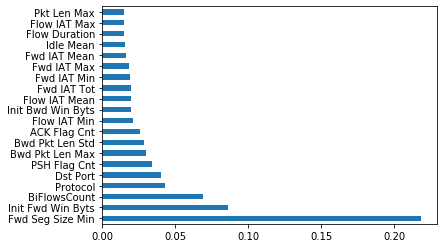

In [22]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")